# 군집 분석 예시
## 진행 순서
    1. 데이터 준비
    2. EDA
    3. 데이터 전처리
    4. 모델 선정 및 학습
    5. 모델 평가

### 데이터 준비
- 앞서 준비한 전처리가 필요한 데이터셋 활용

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 데이터셋 불러오기
mpg = pd.read_csv('mympg.csv')

### 데이터 전처리 수행

In [126]:
# 결측치 처리(여기서는 제거)
mpg.dropna(inplace=True)

# 숫자 특성만 사용
numerical_features = mpg.select_dtypes(include=[np.number])
numerical_features

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
5,15.0,8,429.0,198.0,4341,10.0,70
6,14.0,8,454.0,220.0,4354,9.0,70
7,14.0,8,440.0,215.0,4312,8.5,70
8,14.0,8,455.0,225.0,4425,10.0,70
9,15.0,8,390.0,190.0,3850,8.5,70
...,...,...,...,...,...,...,...
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82
397,31.0,4,119.0,82.0,2720,19.4,82


In [127]:
# 군집분석을 위해 피처 스케일링 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)
scaled_features

array([[-0.9079433 ,  1.50880138,  2.24621039, ...,  1.60189759,
        -2.02665205, -1.656382  ],
       [-1.01749053,  1.50880138,  2.48463681, ...,  1.61713425,
        -2.39007628, -1.656382  ],
       [-1.01749053,  1.50880138,  2.35111802, ...,  1.56790811,
        -2.57178839, -1.656382  ],
       ...,
       [ 0.51617076, -0.8541247 , -0.70074017, ..., -0.40934181,
         1.09879628,  1.63376927],
       [ 0.84481247, -0.8541247 , -0.71027722, ..., -0.29799697,
         1.38953566,  1.63376927],
       [-1.01749053,  1.50880138,  2.35111802, ...,  1.56790811,
        -2.57178839, -1.656382  ]])

### 모델 학습

In [128]:
# k-평균 모델 생성
kmeans = KMeans(random_state=42)
clusters = kmeans.fit_predict(scaled_features)

C:\Users\ithotgi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 클러스터 시각화를 위해 PCA(주성분 분석)

In [129]:
# PCA 사용하여 시각화를 용이하게 만듦.
# PCA를 통해 차원을 줄여 2D 그래프로 시각화
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
principal_components

array([[ 4.62138794e+00,  3.84057898e-01],
       [ 5.12112864e+00,  3.03634394e-01],
       [ 5.04018108e+00,  3.44212694e-01],
       [ 5.10947192e+00,  2.83199421e-01],
       [ 4.28949869e+00,  5.76160617e-01],
       [ 3.74059118e+00,  7.25020623e-01],
       [ 3.72701715e+00,  8.16230658e-01],
       [ 7.23713692e+00,  3.13405297e+00],
       [ 4.45377291e+00,  6.21344700e-01],
       [-6.82401186e-01,  1.94104928e+00],
       [ 4.21891185e-01,  1.50248628e+00],
       [ 5.83777557e-01,  1.62599053e+00],
       [ 1.87637927e-01,  1.61952086e+00],
       [-1.01507428e+00,  1.95398316e+00],
       [-2.21636303e+00,  2.22466663e+00],
       [-9.41732263e-01,  1.88858919e+00],
       [-6.81191221e-01,  1.94290127e+00],
       [-1.02378133e+00,  1.95454779e+00],
       [-3.36065644e-01,  1.83393479e+00],
       [ 3.74285303e-01,  1.58268480e+00],
       [ 4.43961565e+00,  5.78808018e-01],
       [ 3.83143124e+00,  7.75472753e-01],
       [ 4.10783806e+00,  6.86006226e-01],
       [ 3.

In [130]:
# 주성분을 컬럼으로 추가하여 데이터프레임 생성
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Cluster'] = clusters
principal_df

,PC1,PC2,Cluster
0,4.621388,0.384058,6
1,5.121129,0.303634,6
2,5.040181,0.344213,6
3,5.109472,0.283199,6
4,4.289499,0.576161,6
...,...,...,...
383,-3.925117,-1.282626,4
384,-1.465134,-1.264573,2
385,-1.996623,-1.117573,4
386,-2.129164,-1.224450,4


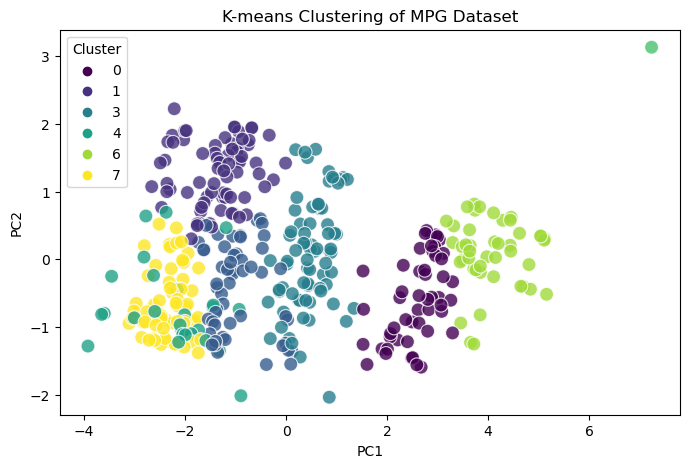

In [131]:
# 시각화
plt.figure(figsize=(8, 5))
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=principal_df, palette="viridis", s=100, alpha=0.8)
plt.title("K-means Clustering of MPG Dataset")
plt.show()

### 군집 분석 결과 데이터 확인

In [132]:
# 군집 중심 확인
centroids = kmeans.cluster_centers_

In [133]:
# 표준화된 데이터를 원래 스케일로 변환
original_centroids = scaler.inverse_transform(centroids)

In [134]:
# 군집 중심 출력
for i, centroid in enumerate(original_centroids):
    print(f"Cluster {i} center:", centroid)

Cluster 0 center: [  15.79411765    7.96078431  317.52941176  142.78431373 3984.8627451
   13.64117647   75.68627451]
Cluster 1 center: [  25.44736842    3.97368421  104.30921053   80.51315789 2251.63157895
   16.62105263   72.89473684]
Cluster 2 center: [  26.10566038    4.32075472  137.9245283    95.94339623 2635.16981132
   14.61132075   78.83018868]
Cluster 3 center: [  19.04533333    6.10666667  227.41333333   99.82666667 3271.61333333
   16.728        75.41333333]
Cluster 4 center: [  31.45769231    4.23076923  122.30769231   70.96153846 2635.46153846
   20.41153846   80.        ]
Cluster 5 center: [ -70.     8.   400.   150.  3761.     9.5   70. ]
Cluster 6 center: [  13.20454545    8.          384.13636364  184.15909091 4374.97727273
   11.78181818   71.93181818]
Cluster 7 center: [  34.76451613    4.           98.37096774   70.33870968 2094.20967742
   16.08387097   79.91935484]


In [135]:
# 군집에 속한 데이터의 통계 확인
clustered_data = principal_df.copy()
clustered_data

,PC1,PC2,Cluster
0,4.621388,0.384058,6
1,5.121129,0.303634,6
2,5.040181,0.344213,6
3,5.109472,0.283199,6
4,4.289499,0.576161,6
...,...,...,...
383,-3.925117,-1.282626,4
384,-1.465134,-1.264573,2
385,-1.996623,-1.117573,4
386,-2.129164,-1.224450,4


In [136]:
# 군집별 평균
print(clustered_data.groupby('Cluster').mean())

              PC1       PC2
Cluster                    
0        2.594601 -0.579741
1       -1.354561  1.289647
2       -0.954067 -0.441411
3        0.493908  0.087306
4       -2.222936 -0.721027
5        7.237137  3.134053
6        4.064624  0.081369
7       -2.324836 -0.638179


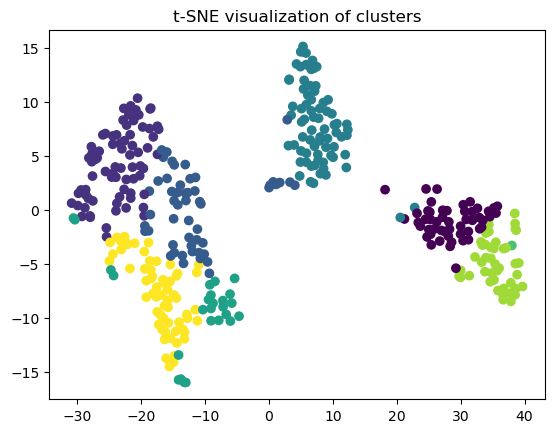

In [137]:
# 시각화를 통한 확인 (t-SNE)
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
reduced_data = tsne.fit_transform(scaled_features)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("t-SNE visualization of clusters")
plt.show()

##### 총 7개의 군집으로 나눠짐

## 하이퍼 파라미터 튜닝 개념

C:\Users\ithotgi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


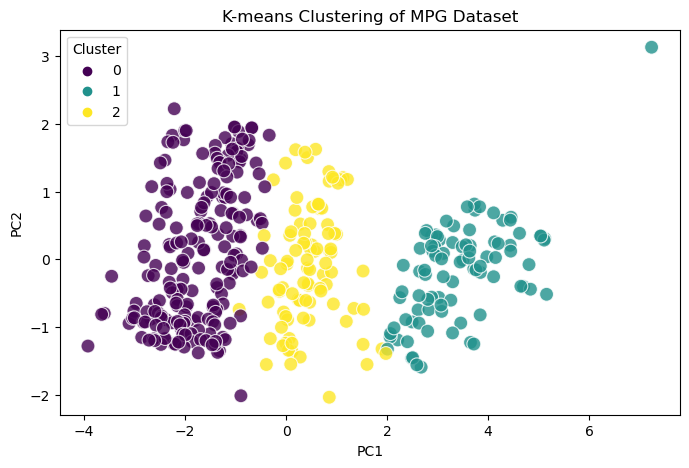

군집 중심: [[ 0.66392462 -0.85121469 -0.79890608 -0.67131028 -0.78110713  0.36084818
   0.29258692]
 [-1.08881795  1.50880138  1.5206523   1.53988452  1.43204136 -1.08296048
  -0.66324374]
 [-0.38719033  0.38952061  0.26651818 -0.0243539   0.31243183  0.25488698
   0.00312413]]
Cluster 0 center: [  29.34876847    4.00492611  109.70689655   78.21182266 2307.80788177
   16.56945813   77.10837438]
Cluster 1 center: [  13.34888889    8.          352.92222222  163.83333333 4196.07777778
   12.59666667   73.62222222]
Cluster 2 center: [  19.75368421    6.10526316  221.42105263  103.26315789 3240.82105263
   16.27789474   76.05263158]
              PC1       PC2
Cluster                    
0       -1.739061  0.120731
1        3.426127 -0.182337
2        0.470293 -0.085242


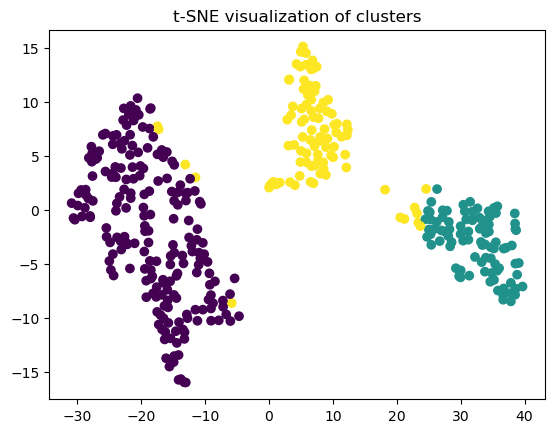

In [138]:
# 하이퍼 파라미터 튜닝(클러스터 개수를 3개로 조정)
# k-평균 모델 생성
kmeans3 = KMeans(n_clusters=3, random_state=42)
clusters3 = kmeans3.fit_predict(scaled_features)

# PCA 사용하여 시각화를 용이하게 만듦.
# PCA를 통해 차원을 줄여 2D 그래프로 시각화
pca3 = PCA(n_components=2)
principal_components3 = pca3.fit_transform(scaled_features)

# 주성분을 컬럼으로 추가하여 데이터프레임 생성
principal_df3 = pd.DataFrame(data=principal_components3, columns=['PC1', 'PC2'])
principal_df3['Cluster'] = clusters3

plt.figure(figsize=(8, 5))
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=principal_df3, palette="viridis", s=100, alpha=0.8)
plt.title("K-means Clustering of MPG Dataset")
plt.show()

# 군집 중심 확인
centroids = kmeans3.cluster_centers_
print('군집 중심:', centroids)

# 표준화된 데이터를 원래 스케일로 변환
original_centroids = scaler.inverse_transform(centroids)

# 군집 중심 출력
for i, centroid in enumerate(original_centroids):
    print(f"Cluster {i} center:", centroid)

# 군집에 속한 데이터의 통계 확인
clustered_data3 = principal_df3.copy()
clustered_data3['Cluster'] = kmeans3.labels_

# 군집별 평균
print(clustered_data3.groupby('Cluster').mean())

# 시각화를 통한 확인 (t-SNE)
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
reduced_data = tsne.fit_transform(scaled_features)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans3.labels_, cmap='viridis')
plt.title("t-SNE visualization of clusters")
plt.show()

### 덴드로그램
- 클러스터 간의 거리를 트리 구조로 표시

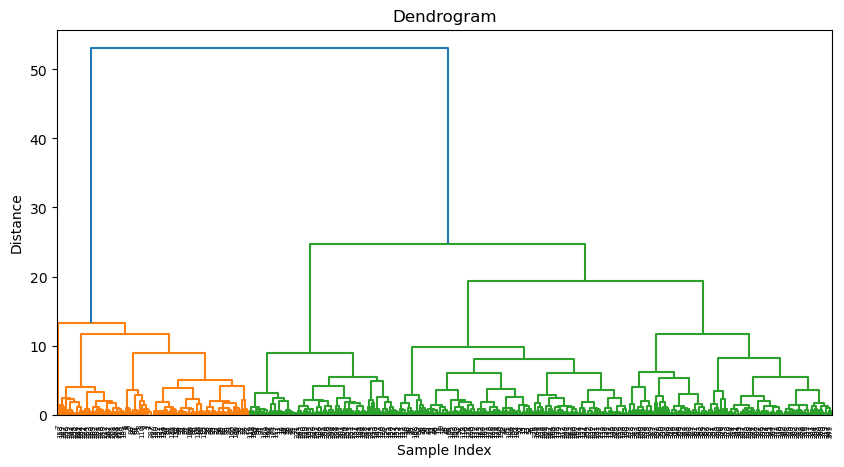

In [139]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# Dendrogram: 클러스터 간의 거리를 표시
linked = linkage(scaled_features, 'ward')

plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top')
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

### 실루엣 계수 시각화

Silhouette Score: 0.3473601116179697
Cluster
0    0.308578
1    0.435933
2    0.346321
Name: Silhouette, dtype: float64


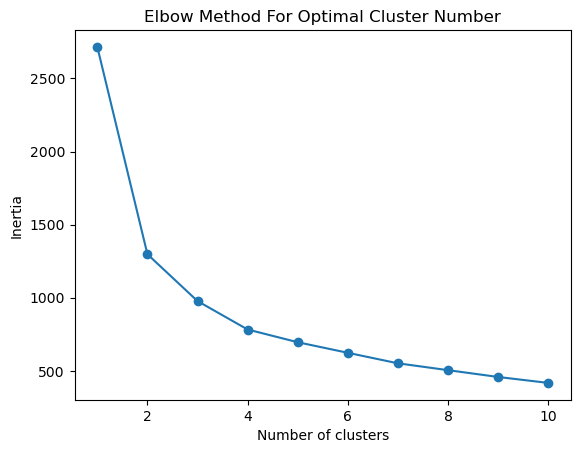

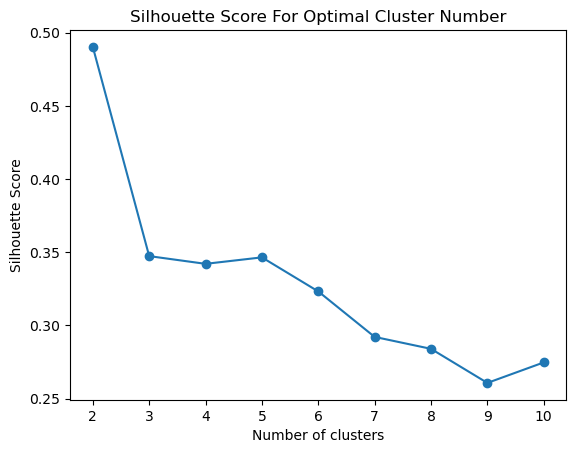

In [140]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# Silhouette Score: 클러스터링이 얼마나 잘 되었는지 평가하는 데 사용
silhouette_avg = silhouette_score(scaled_features, clusters3)
print(f"Silhouette Score: {silhouette_avg}")

# Silhouette Score for individual clusters
silhouette_vals = silhouette_samples(scaled_features, clusters3)

# Adding silhouette values to the dataframe
principal_df3['Silhouette'] = silhouette_vals

# Checking average silhouette score per cluster
print(principal_df3.groupby('Cluster')['Silhouette'].mean())
# Elbow Method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Cluster Number')
plt.show()

# Silhouette Score
sil_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
    sil_scores.append(silhouette_avg)

plt.figure()
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal Cluster Number')
plt.show()


Silhouette Score: 0.3473601116179697
- 전체 데이터 세트에 대한 평균 실루엣 계수

Cluster
0    0.308578
1    0.435933
2    0.346321
- 각 군집(Cluster 0, Cluster 1, Cluster 2)의 실루엣 계수(Silhouette Coefficient)

- 실루엣 계수는 클러스터링의 품질을 측정하는 지표
- 개별 샘플에 대해 계산되며 -1에서 1 사이의 값을 가짐

- 실루엣 계수가 1에 가까울수록 해당 샘플이 잘 클러스터링 되어 있다는 것을 의미
- 0에 가까우면 클러스터의 경계에 위치해 있다는 것을 나타냄
- -1에 가까운 값은 잘못된 클러스터에 할당되었다는 것을 나타냄

- 각 군집의 평균 실루엣 계수를 살펴보면:
    Cluster 0의 평균 실루엣 계수는 약 0.375로, 이 군집 내 샘플들이 상대적으로 잘 그룹화되어 있음
    Cluster 1의 평균 실루엣 계수는 약 0.503으로, 이 군집 내 샘플들이 더욱 잘 그룹화되어 있음
    Cluster 2의 평균 실루엣 계수는 약 0.348로, 이 군집은 Cluster 0에 비해 비슷한 수준으로 그룹화

- 일반적으로 실루엣 계수가 0.5 이상이면 클러스터링이 잘 되고 있음을 나타냄
- 이 경우 Cluster 1이 가장 높은 실루엣 계수를 가지고 있으므로 해당 군집이 가장 잘 그룹화되어 있음
- 그러나 실루엣 계수만으로 클러스터링 성능을 판단하는 것은 제한적일 수 있으며, 다른 평가 지표와 함께 고려하는 것이 좋음

- 클러스터 개수가 1부터 10까지 변화할 때 각각의 inertia(제곱 거리 합)과 실루엣 점수를 시각화
- 엘보 방법에서는 inertia가 급격히 감소하는 지점을 찾음
- 실루엣 점수에서는 점수가 가장 높은 지점을 찾아 최적의 클러스터 수를 결정